In [1]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math
from collections import Counter

In [2]:
Num_smaples = 100
Num_smaples_training = int(.9*Num_smaples)

In [3]:
(X,y) =  make_blobs(n_samples=Num_smaples,n_features=2,centers=2,cluster_std=1.95,random_state=50)
X_train = X[0: Num_smaples_training]
y_train = y[0:Num_smaples_training]


X_validation = X[Num_smaples_training:]
y_validation = y[Num_smaples_training:]

len(X_validation)

10

In [4]:
X

array([[  2.29225964, -10.066572  ],
       [ -2.62293912,   2.73212411],
       [ -0.91182427,  -5.75173228],
       [ -7.35483906,  -4.97351536],
       [-10.35241781,  -2.03592362],
       [ -5.21924189,  -2.45540472],
       [ -2.05314291,  -2.32046674],
       [ -0.80774103,  -4.70020891],
       [  0.16411929,  -4.88167264],
       [  1.27248878,  -4.47505774],
       [  5.16728015,  -8.3465455 ],
       [  1.22625287,  -7.71565724],
       [ -1.70226211,  -1.42558587],
       [  1.48258064,  -5.33790159],
       [ -4.4194506 ,  -1.12536515],
       [ -8.00379306,  -1.77030809],
       [ -3.36180063,  -4.44473305],
       [ -0.49611399,  -4.75499796],
       [  1.56388873,  -8.37540702],
       [ -0.81568275, -10.45163144],
       [ -6.28045145,  -0.78553002],
       [ -0.72165253,  -2.76043963],
       [ -0.61135748,  -5.3463834 ],
       [ -6.37300011,  -6.84059758],
       [ -0.4987789 ,  -3.98941369],
       [  2.8592743 ,  -7.9865461 ],
       [ -1.84301528,  -5.42806582],
 

In [5]:
y

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

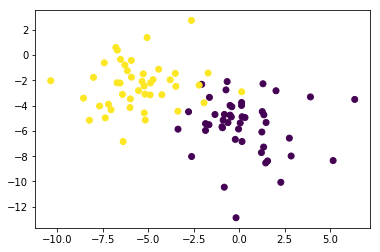

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train)
plt.show()

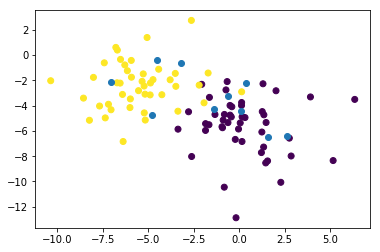

In [7]:
prediction_points = X_validation
prediction_points = np.array(prediction_points)

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train)
plt.scatter(prediction_points[:,0],prediction_points[:,1],marker='o')
plt.show()

In [8]:
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X_train - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

In [9]:
def predict(prediction_points,k):
    points_labels=[]
    
    for point in prediction_points:
        distances=get_eculidean_distance(point,k)
        
        results=[]
        for index in distances:
            results.append(y[index])
        
        label=Counter(results).most_common(1)
        points_labels.append([point,label[0][0]])
        
    return points_labels

In [10]:
#Calculating the accuracy
def get_accuracy(predictions):
    error=np.sum((predictions-y_validation)**2)
    accuracy=100-(error/len(y_validation))*100
    return accuracy

In [11]:
#for different K values 
acc=[]
for k in range(1,10):
    results=predict(X_validation,k)
    predictions=[]
    for result in results:
        predictions.append(result[1])
    acc.append([get_accuracy(predictions),k])

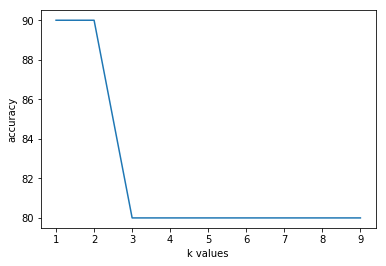

In [12]:
plotx=[]
ploty=[]
for a in acc:
    plotx.append(a[1])
    ploty.append(a[0])
    
plt.plot(plotx,ploty)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()